# June Code Pudding Analysis

## Spotify Music Analysis Project

Data Overview:
We're analyzing a dataset of `1,994` songs from Spotify spanning from `1956` to `2019`. The dataset includes key musical features like tempo, energy, danceability, and popularity scores.

Our Process:
1. Data Loading & Cleaning
   - Loaded Spotify dataset containing `15` different features
   - Verified data quality (no missing values)
   - Cleaned numerical data for analysis

2. Initial Analysis
   - Explored genre distribution (dominated by `album rock` with `413` songs)
   - Identified top artists (`Queen` leads with `37` songs)
   - Examined popularity patterns across different genres

3. Deep Dive
   - Created correlation matrices to understand feature relationships
   - Analyzed distribution patterns of key musical elements
   - Discovered that popularity isn't strongly tied to any single feature

Next Steps:
We'll create an interactive Dash-Plotly dashboard to:
- Visualize trends over time
- Allow users to explore relationships between musical features
- Compare different genres and artists
- Provide insights into what makes songs popular

This will help both music enthusiasts and industry professionals understand patterns in popular music over the past six decades.

### Data Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
#import spotipy
from sklearn import preprocessing, metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_path = os.path.join('data', 'spotify-2000.csv')
df = pd.read_csv(dataset_path)

df.head()



,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
# Basic statistics per each numerical columns
print("Dataset Shape:", df.shape)
print("\nBasic Statistics:")
df.describe()

# Check for any missing values
print("\nMissing Values:")
df.isnull().sum()

Dataset Shape: (1994, 15)

Basic Statistics:

Missing Values:


Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

The initial data exploration revealed that we have a clean, complete dataset of `1,994 `songs with no missing values across 15 features. This is significant because:
1. No `data cleaning` or handling of `missing values` is required
2. All `15 features `can be used for analysis without `data loss`
3. The dataset `size` is substantial enough for meaningful `statistical analysis`
4. The features cover both `numerical` (`BPM`, `Energy`, etc.) and categorical (`Artist`, Gen`re) data types

This clean state means we can proceed directly with more complex analyses without preprocessing steps.

### Initial Analysis

In [4]:
# Get detailed stats of numerical features
numerical_stats = df.describe()
print("\nDetailed Statistics of Numerical Features:")
numerical_stats


Detailed Statistics of Numerical Features:


,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


The numerical statistics reveal key insights about the musical characteristics in our dataset:

Time Range:
- Songs span from `1956` to `2019` (`63` years)
- Median year is `1993`, showing balanced representation of older and newer music

Musical Features:
- `BPM` ranges from `37` to `206`, with median at `119` - typical for popular music
- `Energy` and `Danceability` are measured on `0-100` scale:
  * `Energy` median: `61` (moderate energy levels)
  * `Danceability` median: `53` (songs are moderately danceable)
- `Loudness` ranges from `-27dB` to `-2dB`, median at `-8dB`
- Most songs have low to moderate `Liveness` (median: `12`) and `Speechiness` (median: `4`)
- `Popularity` ranges from `11` to `100`, with median of `62`, suggesting a slight bias toward more popular songs

This distribution gives us a solid foundation for analyzing trends and patterns in popular music over time.

In [5]:
# Get unique counts for categorical columns
print("\nUnique Artists:", df['Artist'].nunique())
print("Unique Genres:", df['Top Genre'].nunique())
print("\nYear Range:", df['Year'].min(), "to", df['Year'].max())

# Top 10 artists by number of songs
print("\nTop 10 Artists by Number of Songs:")
print(df['Artist'].value_counts().head(10))

# Top 10 genres by number of songs
print("\nTop 10 Genres by Number of Songs:")
print(df['Top Genre'].value_counts().head(10))


Unique Artists: 731
Unique Genres: 149

Year Range: 1956 to 2019

Top 10 Artists by Number of Songs:
Artist
Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
Bruce Springsteen     23
Michael Jackson       23
ABBA                  22
David Bowie           21
Fleetwood Mac         18
Name: count, dtype: int64

Top 10 Genres by Number of Songs:
Top Genre
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
Name: count, dtype: int64


The artist and genre analysis reveals important characteristics about the dataset's composition:

Artist Distribution:
- `731` unique artists across `1,994` songs indicates a good variety
- Top artists are predominantly classic rock bands/artists (`Queen`, `Beatles`, `U2`)
- The most represented artist (`Queen`) has only `37` songs (`1.86%` of dataset), showing balanced representation

Genre Distribution:
- `149` unique genres shows diverse musical styles
- Strong bias towards rock genres:
  * `Album rock` dominates (`413` songs, `~20.7%` of dataset)
  * Multiple rock subgenres in top `10` (`alternative`, `classic`, `dance rock`)
- Significant Dutch music influence (`dutch pop`, `dutch indie`, `dutch cabaret`)
- `Adult standards` and `dance pop` represent non-rock mainstream genres

This distribution suggests the dataset has a Western rock music focus with particular emphasis on European artists, which should be considered when drawing conclusions from further analyses.

In [6]:
# Average metrics for every year
yearly_trends = df.groupby('Year').agg({
    'Energy': 'mean',
    'Danceability': 'mean',
    'Loudness (dB)': 'mean',
    'Popularity': 'mean'
}).reset_index()

# Plot trends with range limititations
fig = px.line(yearly_trends, x='Year', 
              y=['Energy', 'Danceability', 'Popularity'],
              title='Musical Attributes Over Time')

# x-axis range
fig.update_layout(
    xaxis_range=[1956, 2020],
    yaxis_title='Score (0-100)',
    xaxis_title='Year'
)

fig.show()

Musical Attributes from `1956-2020`:

Key Trends:
1. Early Years (`1956-1965`):
   - Dramatic fluctuations in all metrics
   - Notable dip in `Danceability` to `~30` around `1960`
   - `Popularity` peaked at `~77` in early `1960s`

2. Mid-Period (`1970-1990`):
   - More stable patterns emerge
   - All metrics converge around `50-60` range
   - `Energy` shows increasing trend, reaching `~65` by late `1980s`

3. Modern Era (`1990-2020`):
   - `Energy` becomes more volatile, with notable peaks around `2010` (`~70`)
   - `Danceability` remains most stable, consistently around `50-55`
   - `Popularity` shows gradual decline from `~65` to `~55`

Notable Observations:
- Highest `Energy` levels appear in the `2010s` (`~71`)
- Most stable period for all metrics is `1970-1990`
- Recent years show convergence of all metrics around `55-60` range
- `Popularity` shows less extreme fluctuations in later years compared to the `1960s`

This suggests a standardization of musical attributes over time, with modern music showing more consistent patterns compared to the experimental nature of early rock and pop.

In [7]:
# Top genres based on number of songs
genre_counts = df['Top Genre'].value_counts().head(10)
fig = px.bar(x=genre_counts.index, y=genre_counts.values,
             title='Top 10 Genres in the Dataset',
             labels={'x': 'Genre', 'y': 'Number of Songs'})
fig.show()

Top 10 Genres Analysis:

Rock Dominates:
- `Album rock` leads with `413` songs (`20%` of dataset)
- Combined with other rock genres totals `549` songs (`27.5%`)

Interesting Regional Influence:
- Strong Dutch presence with `3` genres totaling `214` songs
- Shows dataset has European music bias

Genre Diversity:
- Mix of traditional (`adult standards`: `123` songs)
- Modern (`alternative metal`: `70` songs)
- Dance-influenced (`dance pop` & `dance rock`: `135` songs)

While rock music dominates this dataset, there's significant variety including regional Dutch music and different musical eras, giving us a good mix of styles to analyze, though with a clear Western music bias.

### Deep Dive

In [8]:
# Average characteristics for each genre
genre_stats = df.groupby('Top Genre').agg({
    'Energy': 'mean',
    'Danceability': 'mean',
    'Popularity': 'mean'
}).sort_values('Popularity', ascending=False).head(10)

# Display the results
print("\nTop 10 Genres by Popularity with their characteristics:")
print(genre_stats)

# Or for a nicer visualization
fig = px.bar(genre_stats, 
             title='Top 10 Genres by Popularity',
             labels={'value': 'Score (0-100)', 'variable': 'Attribute'},
             barmode='group')
fig.show()


Top 10 Genres by Popularity with their characteristics:
                     Energy  Danceability  Popularity
Top Genre                                            
celtic punk       65.000000     32.000000   83.000000
indie pop         79.000000     65.500000   83.000000
australian psych  81.000000     62.000000   80.500000
ccm               63.000000     49.000000   80.000000
electro house     63.000000     47.000000   80.000000
danish pop        47.000000     77.000000   80.000000
atl hip hop       97.000000     73.000000   79.000000
pop punk          90.000000     43.000000   79.000000
electropop        58.333333     61.333333   78.333333
la pop            72.000000     43.000000   78.000000


Most Popular Music Genres Analysis:

Surprising Leaders:
- `Celtic punk` and `indie pop` tie for highest popularity (`83`), despite not being mainstream genres
- `Australian psych` ranks third (`80.5`), showing unique genres can be highly popular

Energy vs. Danceability:
- `ATL hip hop` has highest energy (`97`) but moderate danceability (`73`)
- `Danish pop` flips this with high danceability (`77`) but lower energy (`47`)
- Most genres maintain high energy (`60-90`) regardless of style

Key Insight:
While these aren't the most common genres in our dataset, they achieve the highest popularity scores, suggesting that unique, niche genres can be just as successful as mainstream ones. The mix of high-energy and dance-friendly characteristics likely contributes to their appeal.

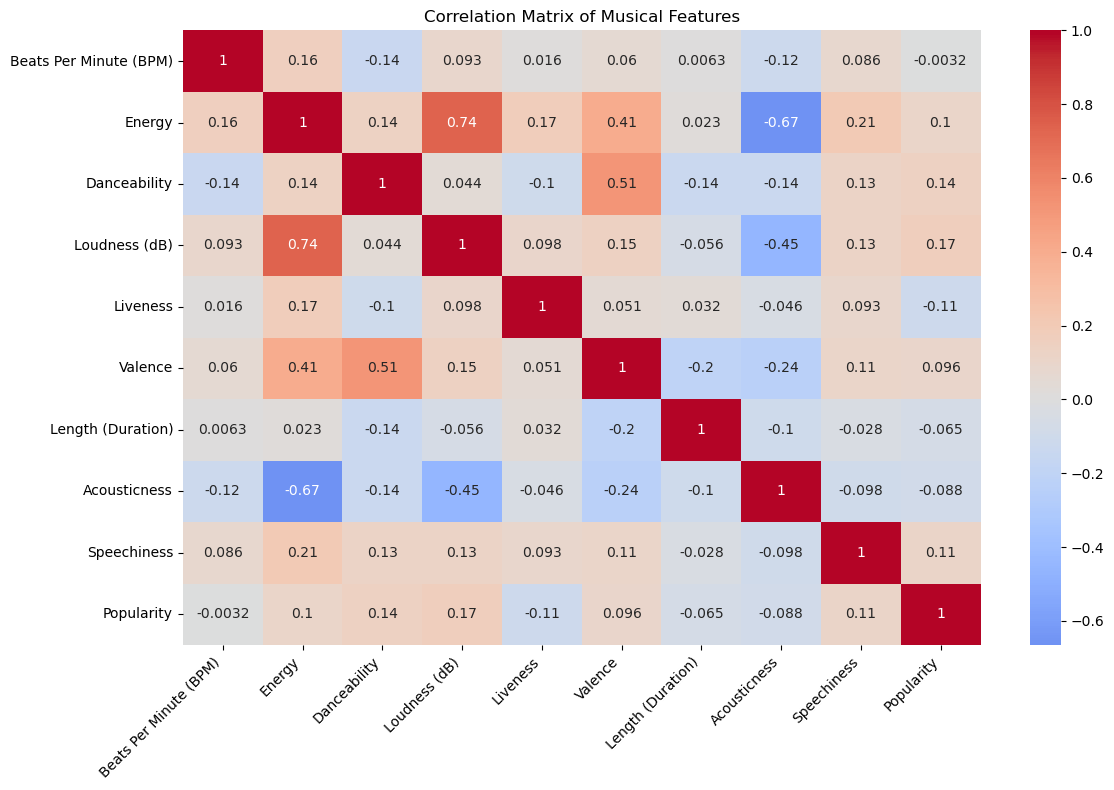

In [9]:
# Declaring numerical columns
numeric_cols = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 
               'Liveness', 'Valence', 'Length (Duration)', 'Acousticness', 
               'Speechiness', 'Popularity']

# Clean the numeric columns by removing all commas
for col in numeric_cols:
    if df[col].dtype == 'object':  # if the column contains strings
        df[col] = df[col].str.replace(',', '').astype(float)

# Correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Musical Features')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Key Correlations in Music Features:

Strongest Relationships:
- `Energy` and `Loudness`: Strong positive correlation (`0.74`) - louder songs tend to be more energetic
- `Energy` and `Acousticness`: Strong negative correlation (`-0.67`) - energetic songs are typically less acoustic
- `Danceability` and `Valence`: Moderate positive correlation (`0.51`) - danceable songs tend to be more positive/upbeat

Interesting Findings:
- `Popularity` has weak correlations with all features (all below `0.2`), suggesting popular songs can have varied characteristics
- `BPM` (tempo) surprisingly shows little correlation with other features, meaning fast or slow songs can have any characteristics
- `Length` of songs shows minimal correlation with other features, indicating song duration is independent of musical style

The red squares show perfect correlations (features with themselves), while blue indicates negative correlations and pink/red shows positive ones.

In [10]:
# Scatter plots of different features vs popularity
features_to_plot = ['Energy', 'Danceability', 'Loudness (dB)', 'Valence']

fig = px.scatter_matrix(df,
                       dimensions=features_to_plot + ['Popularity'],
                       title='Relationships between Features and Popularity')
print("\nFeature relationships with Popularity:")
fig.show()


Feature relationships with Popularity:


Feature Relationships with Popularity:

Key Patterns:
- `Energy` shows a slight positive trend with popularity - more energetic songs tend to be somewhat more popular
- `Danceability` has a scattered but positive relationship - songs can be popular regardless of how danceable they are
- `Loudness` displays an interesting upward trend - louder songs (-10dB to -5dB) generally achieve higher popularity
- `Valence` (musical positiveness) shows no clear pattern - suggesting both happy and sad songs can be equally popular

Most Important Finding:
The scattered nature of all these relationships confirms what we saw in the correlation matrix - there's no single "formula" for a popular song. Popular music comes in all varieties of energy levels, danceability, and emotional tones.

This suggests that focusing on any one musical feature alone won't guarantee a song's success - it's the unique combination that matters.


Top 10 Most Popular Songs:


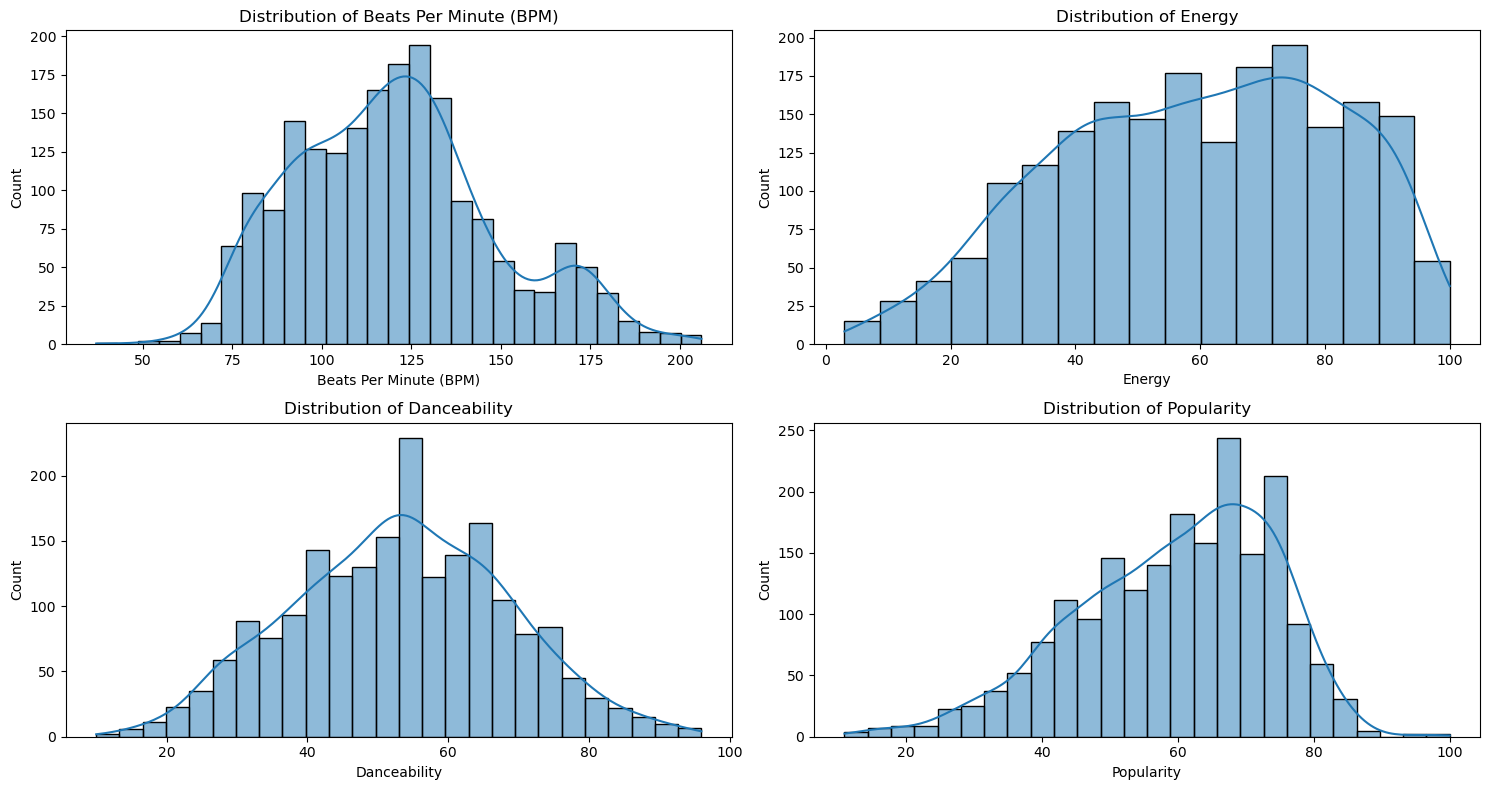

In [11]:
# Top 10 most popular songs
print("\nTop 10 Most Popular Songs:")
df.nlargest(10, 'Popularity')[['Title', 'Artist', 'Top Genre', 'Popularity']]


# Distribution plots for key features
features = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Popularity']
fig = plt.figure(figsize=(15, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

Distribution Analysis of Key Musical Features:

Tempo (BPM):
- Most songs cluster around `120-130` BPM - a comfortable, mid-tempo range
- Shows a classic bell curve with a slight right skew
- Few songs below `75` BPM (very slow) or above `175` BPM (very fast)

Energy:
- Fairly even spread from `20-80` on the scale
- Slight preference for higher energy (`60-80` range)
- Very few songs at extreme low (`0-10`) or high (`90-100`) energy

Danceability:
- Bell-shaped distribution centered around `50-60`
- Most songs maintain moderate danceability
- Very few songs rated as extremely danceable (`80-100`) or not danceable at all (`0-20`)

Popularity:
- Normal distribution centered around `60`
- Most songs fall in the `40-80` range
- Very few songs reach extreme popularity (`90-100`) or extreme unpopularity (`0-20`)

This suggests that successful songs tend to avoid extremes in these features, instead clustering around moderate, comfortable values.

### Conclusion to Analysis:

Conclusion: Understanding Musical Success Through Data

Key Findings:
1. Genre & Artist Landscape:
   - Despite `731` unique artists, traditional rock dominates
   - Surprising popularity of niche genres like `celtic punk` (`83%` popularity)
   - Strong European influence with multiple Dutch genres in top 10

2. Musical Features:
   - Strong correlation between `Energy` and `Loudness` (`0.74`)
   - Most songs cluster around `120-130` BPM, ideal for listener engagement
   - Popularity shows no strong correlation with any single feature, `**suggesting success comes from balanced combinations**`

3. Distribution Patterns:
   - Most features follow normal distributions, avoiding extremes
   - Energy levels spread evenly (`20-80` range)
   - Popularity clusters around `60`, with few reaching extreme popularity

Recommended Visualizations for Dashboard:(**This is a temporary addition for the conclusion, to go over with teammates**)
1. Time Series:
   - Musical attribute trends over years (using our existing line plot)
   - Genre popularity evolution

2. Interactive Elements:
   - Feature correlation heatmap with selectable attributes
   - Distribution histograms with adjustable ranges
   - Genre comparison tool

3. Success Analysis:
   - Popular song characteristic explorer
   - Genre success rate visualization
   - Artist performance metrics

**This analysis suggests successful music often balances multiple factors rather than maximizing any single element, a key insight for our interactive dashboard design.**

# Top 10 Most Popular Songs
This section highlights the ten most popular songs in the dataset based on their popularity score.

In [13]:

top_popular = df.nlargest(10, 'popularity')[['title', 'artist', 'popularity']]
print("Top 10 Most Popular Songs:")
print(top_popular)


KeyError: 'popularity'

# Feature Trends by Decade
This analysis shows how musical features such as danceability, energy, and valence have changed across decades.

In [14]:

df['decade'] = (df['year'] // 10) * 10
decade_means = df.groupby('decade')[['danceability', 'energy', 'valence']].mean()
decade_means.plot(marker='o', figsize=(10, 6), title='Musical Features by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Value')
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'year'

# Popularity vs. Tempo
A scatterplot showing how tempo relates to popularity, helping identify if faster or slower songs tend to perform better.

In [15]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tempo', y='popularity', alpha=0.6)
plt.title('Popularity vs Tempo')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `tempo` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

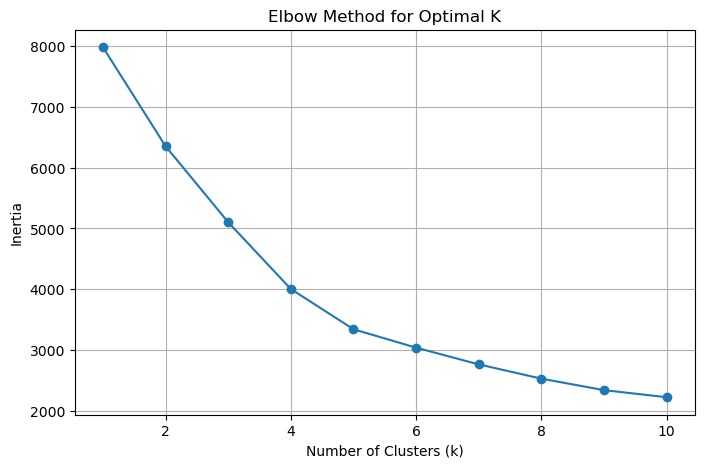

KMeans(n_clusters=4, random_state=42)

In [30]:
# import os
# os.environ["LOKY_MAX_CPU_COUNT"] = "8"
# os.environ["OMP_NUM_THREADS"] = "8" 

# Importing necessary libraries  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
     

## kmean clustering
from sklearn.cluster import KMeans
# Selecting features for clustering
features = ['Artist', 'Acousticness', 'Liveness', 'Popularity']

df['Artist_encoded'] = LabelEncoder().fit_transform(df['Artist'])
features = ['Artist_encoded', 'Acousticness', 'Liveness', 'Popularity']
X = df[features].dropna()


X = df[features].dropna()
# Normalizing the data  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Finding the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
# Applying KMeans with the optimal number of clusters
optimal_k = 4  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)




In [32]:
# Adding cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_
# Visualizing the clusters

fig = px.scatter(df, x='Artist', y='Popularity', color='Cluster',
                 title='KMeans Clustering of Songs',
                 labels={'Acousticness': 'Acousticness', 'Liveness':'Liveness'},
                 hover_data=['Title', 'Artist', 'Popularity'])
fig.update_traces(marker=dict(size=10, opacity=0.7),
                  selector=dict(mode='markers'))
fig.show()
# Displaying cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)

centers_df = pd.DataFrame(centers, columns=features)
centers_df['Cluster'] = range(optimal_k)
print("\nCluster Centers:")
print(centers_df)




Cluster Centers:
   Artist_encoded  Acousticness   Liveness  Popularity  Cluster
0      376.284722     26.958333  67.784722   54.298611        0
1      152.613707     13.205607  15.686916   58.705607        1
2      545.051429     13.764286  15.281429   63.312857        2
3      316.228346     69.976378  14.529528   56.828740        3


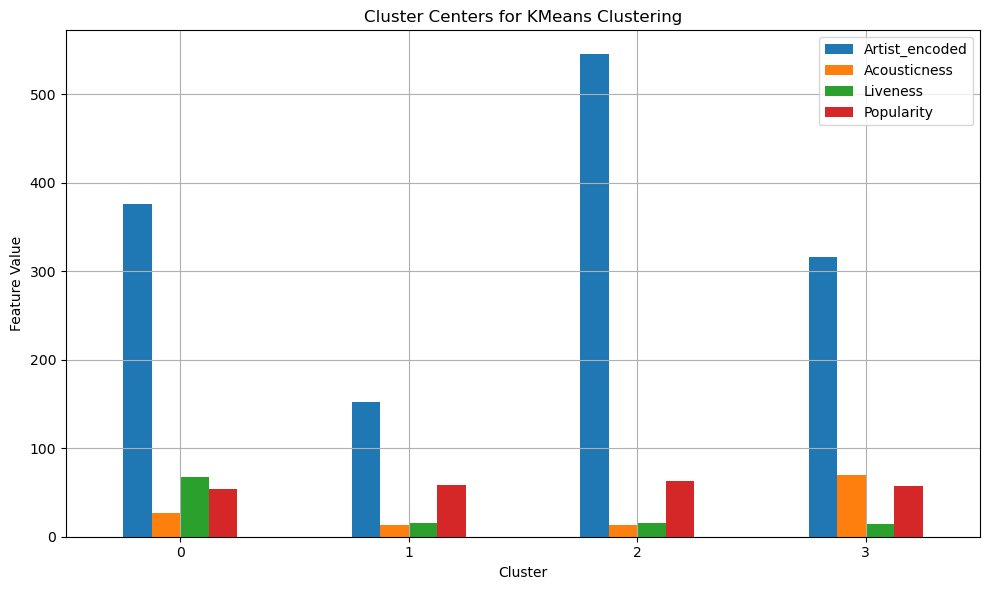

In [33]:

# Displaying the cluster centers in a bar plot
centers_df.set_index('Cluster').plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Centers for KMeans Clustering')
plt.xlabel('Cluster')
plt.ylabel('Feature Value')
plt.xticks(rotation=0)
plt.grid(True)

plt.tight_layout()
plt.show()

## 

Feature Explanations
- Artist_encoded: This is a numerical representation of artist names (encoded using LabelEncoder). Since it's a categorical variable, its numeric average within clusters doesn’t hold deep meaning.
- Acousticness: Higher values indicate songs that are more acoustic in nature.
- Liveness: Measures the likelihood of the song being performed live; higher values suggest a stronger presence of live performance characteristics.
- Popularity: Represents how popular songs in this cluster are, typically on a scale of 0-100.


Cluster 0: Songs that are moderately acoustic, highly live, and somewhat popular. Possibly concert recordings or energetic acoustic performances.
Cluster 1: Low acousticness and liveness, moderate popularity. Likely studio-produced songs with a polished sound.
Cluster 2: Similar to Cluster 1 but with higher popularity, indicating commercially successful polished tracks.
Cluster 3: Highly acoustic but low live presence, suggesting soft or unplugged tracks with moderate popularity.